# Stream Graph
Es una variación del gráfico de áreas apiladas. El Stream Graph representa la variacion de magnitud de una variable en diferentes grupos a lo largo del tiempo. Tiene exactamente el mismo objetivo que el gráfico de áreas apiladas. Sin embargo, el Eje Y no es fijo. Es decir, no hay un "cero". Por lo que su objetivo no es demostrar presición, si no cambios de proporcionalidad entre grupos. Incluso, es normal suavizar la línea que une los puntos para que se vea mas agradable a la vista.    
**Eje X**: Variable categórica ordinal     
**Eje Y**: Variable numérica     
**Otros nombres**: Gráfico de Flujo

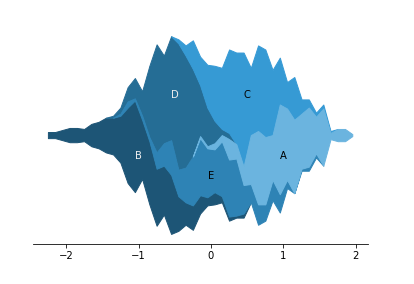
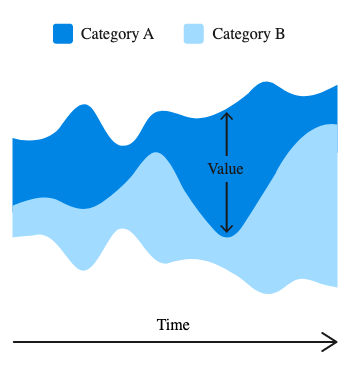

### Cuando utilizar
- Comparar diferencias de proporcionalidad de propiedades numéricas de diferentes grupos a lo largo del tiempo. 
- No me importa mucho exponer con presición las magnitudes de mis datos.
- Quiero encontrar patrones temporales en mis datos.

### Cuando no utilizar
- Si quiero que las personas determinen con precisión la magnitud de mi variable numérica en cada grupo

### Consejos
- Rápidamente se puede convertir en un gráfico difícil de interpretar. Por lo que su uso es limitado mayomermente a presentaciones visuales y no para demostrar presición.
- Si tengo más de 10 grupos debería pensar en un gráfico de áreas apiladas, o ser selectivo con mis categorías. O en su defecto, utilizar un generador de visualizaciones interactivo para quitar y mostrar categorias a gusto.


## En esta clase
### Datos
Información sobre casos de COVID-19 al rededor del mundo
### Objetivos
1. Como ha cambiado por continente los casos de COVID-19 a través del tiempo

## Referencias
- https://datavizcatalogue.com/ES/metodos/grafico_de_flujo.html
- https://chartio.com/learn/charts/area-chart-complete-guide/#stream-graph

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('../data/covid_data.csv')
df

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251577,ZWE,Africa,Zimbabwe,2023-01-16,259981.0,0.0,0.0,5637.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN
251578,ZWE,Africa,Zimbabwe,2023-01-17,259981.0,0.0,0.0,5637.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN
251579,ZWE,Africa,Zimbabwe,2023-01-18,259981.0,0.0,0.0,5637.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN
251580,ZWE,Africa,Zimbabwe,2023-01-19,259981.0,0.0,0.0,5637.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN


In [3]:
agrupado = df[['date', 'continent', 'new_cases']].groupby(['date', 'continent']).sum()
agrupado = agrupado.unstack(1)
agrupado = agrupado.fillna(0)
agrupado = agrupado.droplevel(0, axis=1)
agrupado

continent,Africa,Asia,Europe,North America,Oceania,South America
date,,,,,,
2020-01-01,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-02,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-03,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-04,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-05,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...
2023-01-16,1002.0,118153.0,37669.0,9813.0,11.0,46261.0
2023-01-17,3922.0,197154.0,38267.0,83173.0,3.0,27680.0
2023-01-18,1321.0,185432.0,32177.0,136071.0,63.0,21720.0


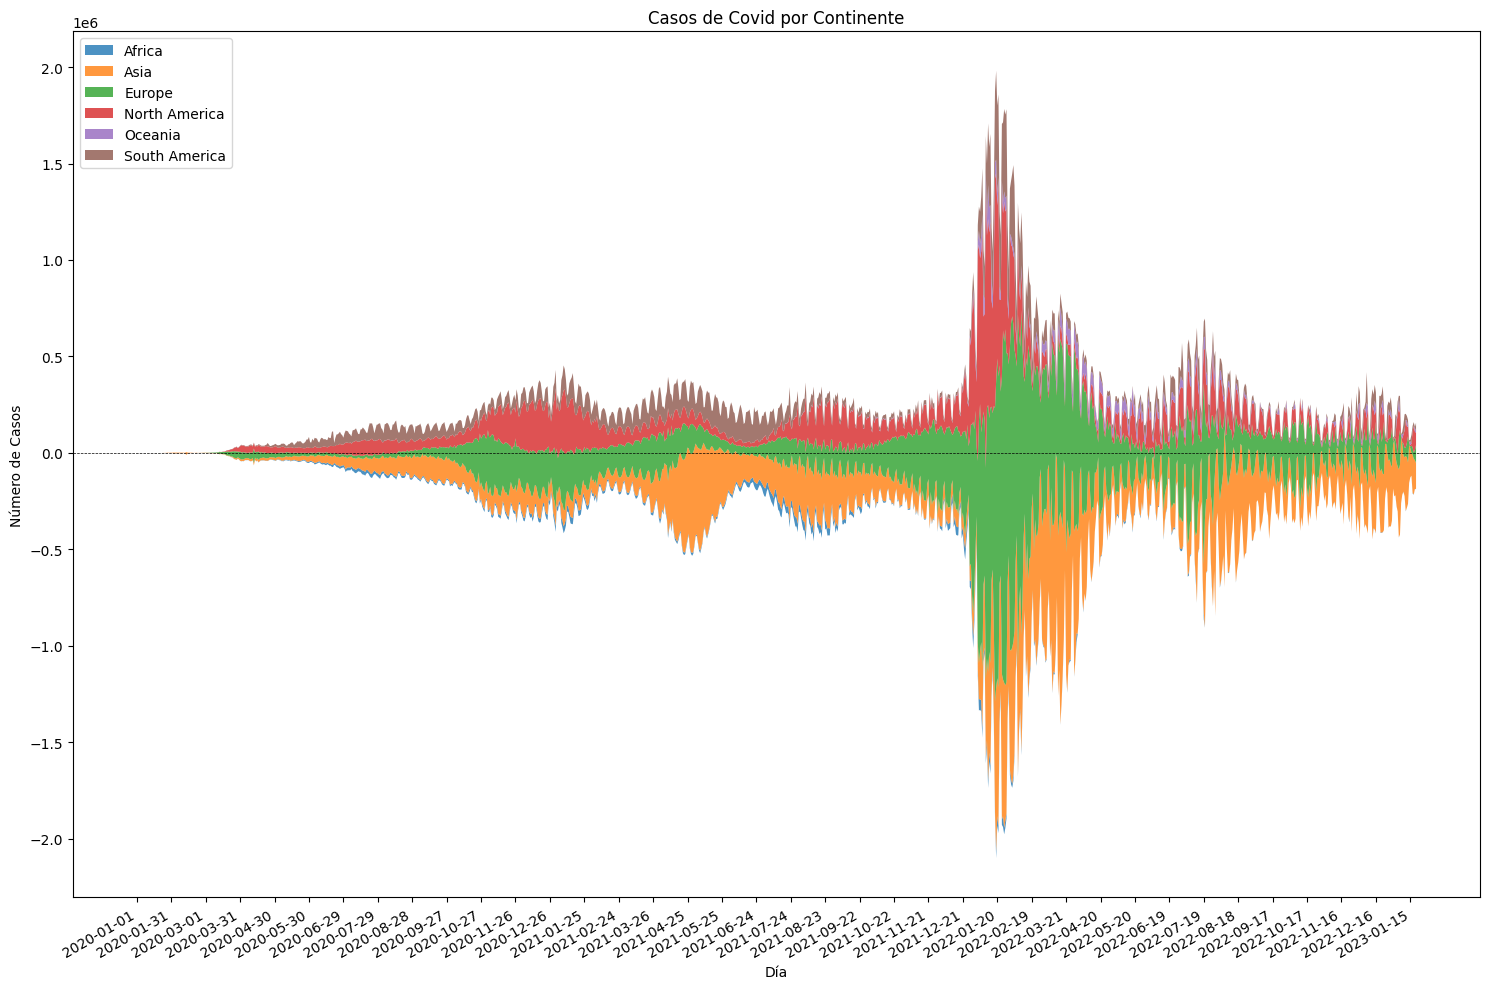

In [4]:
# Streamgraph con Matplotlib
# https://matplotlib.org/stable/gallery/lines_bars_and_markers/stackplot_demo.html

values = [
    agrupado['Africa'],
    agrupado['Asia'],
    agrupado['Europe'],
    agrupado['North America'],
    agrupado['Oceania'],
    agrupado['South America']
]
fig, ax = plt.subplots()
fig.set_size_inches(15, 10)
ax.stackplot(
    agrupado.index.values, 
    values, 
    labels=agrupado.columns.values, 
    baseline='wiggle',
    alpha=0.8
)
ax.legend(loc='upper left')
ax.set_title('Casos de Covid por Continente')
ax.set_xlabel('Día')
ax.set_ylabel('Número de Casos')
ax.axhline(0, color="black", ls="--", linewidth=0.5)
fig.autofmt_xdate()
fig.tight_layout()
plt.xticks(np.arange(0, len(agrupado.index.values), 30))
plt.show()

In [5]:
# Con curva suavizada por una funcion gaussiana
# https://www.python-graph-gallery.com/streamchart-basic-matplotlib
from scipy import stats

def gaussian_smooth(x, y, grid, sd):
    weights = np.transpose([stats.norm.pdf(grid, m, sd) for m in x])
    weights = weights / weights.sum(0)
    return (weights * y).sum(1)

x = np.arange(0, len(agrupado.index.values))
grid = np.linspace(0, len(agrupado.index.values), num=len(agrupado.index.values))

y_suavizado = [gaussian_smooth(x, list(y_), grid, 1) for y_ in values]

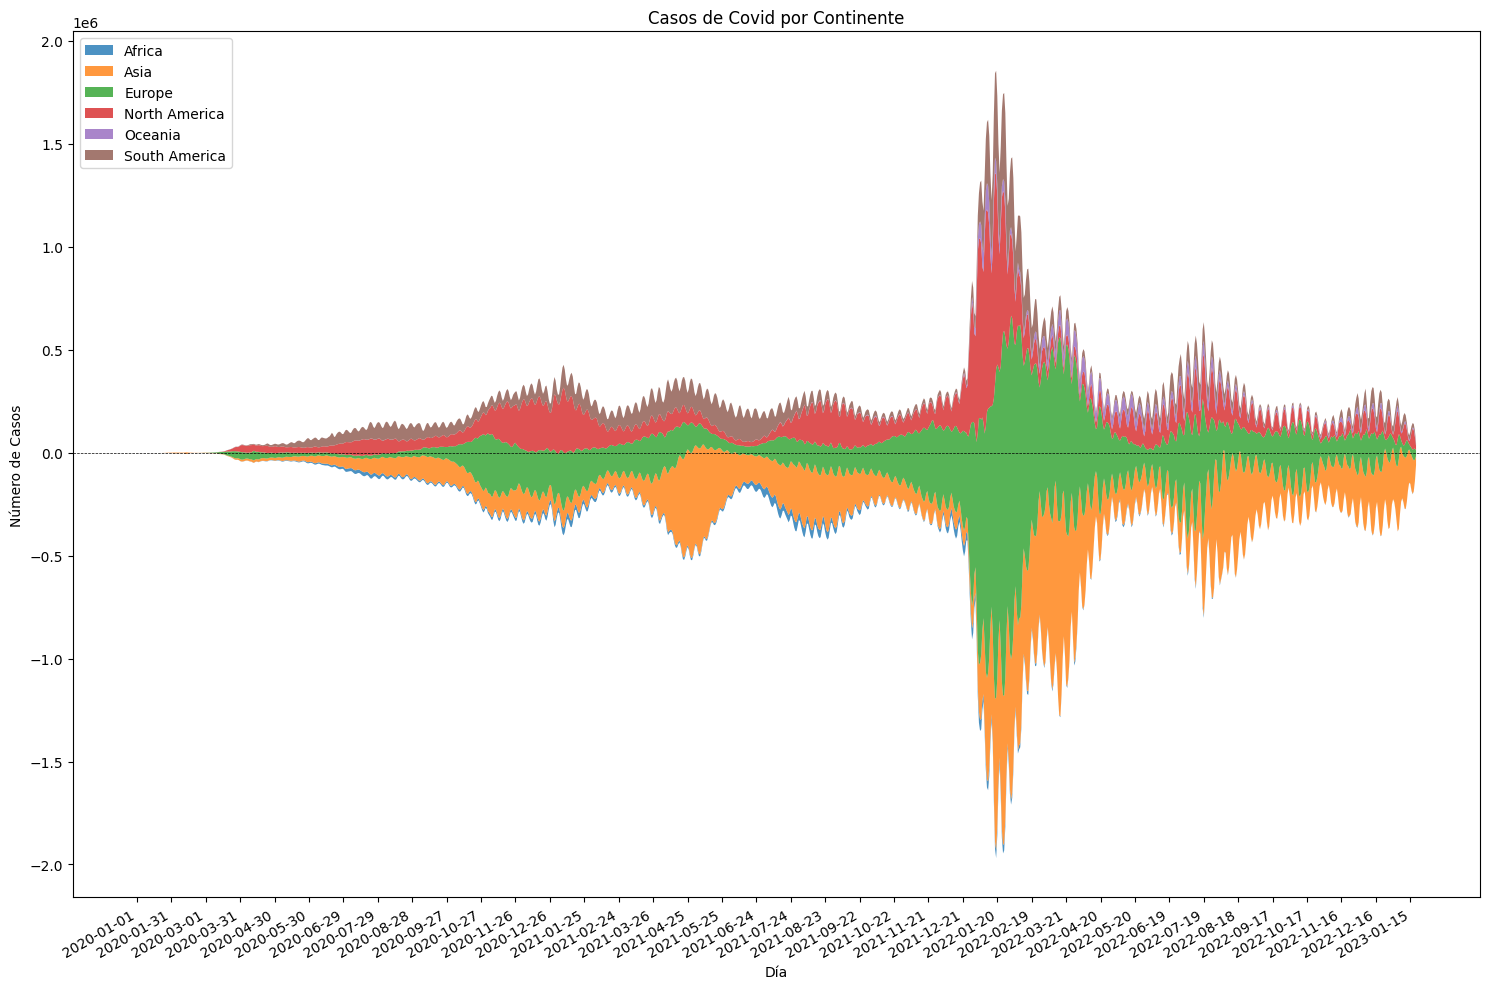

In [6]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 10)
ax.stackplot(
    agrupado.index.values, 
    y_suavizado, 
    labels=agrupado.columns.values, 
    baseline='wiggle',
    alpha=0.8
)
ax.legend(loc='upper left')
ax.set_title('Casos de Covid por Continente')
ax.set_xlabel('Día')
ax.set_ylabel('Número de Casos')
ax.axhline(0, color="black", ls="--", linewidth=0.5)
fig.autofmt_xdate()
fig.tight_layout()
plt.xticks(np.arange(0, len(agrupado.index.values), 30))
plt.show()